In [2]:
import os
import pickle as pkl
import pandas as pd
import numpy as np

from pydeseq2.utils import build_design_matrix
#from pydeseq2.dds import DeseqDataSet
#from pydeseq2.default_inference import DefaultInference
#from pydeseq2.ds import DeseqStats

In [39]:
# Loading the data from package

In [2]:
# Test simulated data
DATA_PATH = "/Users/katsiarynadavydzenka/Documents/PhD_AI/CN-aware-DGE/Python/datasets/"
counts_df = pd.read_csv(os.path.join(DATA_PATH, "rna_counts_cnv.csv"), index_col=0)
counts_df = counts_df.T
metadata = pd.read_csv(os.path.join(DATA_PATH, "metadata.csv"), index_col=0)
cnv = pd.read_csv(os.path.join(DATA_PATH, "cnv.csv"), index_col=0)
cnv = cnv.T

In [31]:
# Test real data
DATA_PATH = "/Users/katsiarynadavydzenka/Documents/PhD_AI/TCGA/lung_cancer/LUAD/"
counts_df = pd.read_csv(os.path.join(DATA_PATH, "rna_test_4.csv"), index_col=0)
counts_df = counts_df.T
metadata = pd.read_csv(os.path.join(DATA_PATH, "metadata_4.csv"), index_col=0)
cnv = pd.read_csv(os.path.join(DATA_PATH, "cnv_test_4.csv"), index_col=0)
cnv = cnv.T

In [4]:
#design_matrix = build_design_matrix(
    #metadata=metadata,
    #design_factors="condition",
    #expanded=False,
    #intercept=True
#)
#design_matrix = design_matrix.values
#design_matrix.shape

In [4]:
#num_vars = design_matrix.shape[1]
#X = design_matrix

In [32]:
from dds import pydeseq2CN_data
from inference import Inference
from def_inference import DefInference
import utils_pydeseq2CN

In [33]:
inference = DefInference(n_cpus=8)
dds = pydeseq2CN_data(
    counts=counts_df,
    metadata=metadata,
    cnv=cnv,
    design_factors="condition",
    inference=inference
)

In [34]:
dds.fit_size_factors()

Fitting size factors...
... done in 0.02 seconds.



In [35]:
dds.obsm["size_factors"]

array([1.00393679, 0.78337665, 0.79986782, 0.51765414, 0.88188981,
       0.87940419, 0.66000327, 1.00972004, 0.809291  , 1.17046721,
       1.62216313, 0.80604819, 0.70281937, 0.75177975, 0.77872419,
       1.61789374, 0.67780674, 0.94112742, 0.87782886, 0.76984855,
       0.9678707 , 1.2730246 , 2.00598098, 1.07846898, 0.86021239,
       0.71318327, 0.9097599 , 1.05317772, 2.22461431, 1.95761491,
       0.90723806, 0.98905681, 0.72626891, 1.04637093, 1.51146626,
       2.85429941, 0.82674979, 0.78801612, 1.19221339, 0.75444408])

In [36]:
dds.fit_genewise_dispersions()

Fitting dispersions...
... done in 0.86 seconds.



In [37]:
dds.fit_dispersion_trend()

Fitting dispersion trend curve...
... done in 0.07 seconds.



In [38]:
#dds.uns["trend_coeffs"]
dds.varm["fitted_dispersions"]

array([0.1320342 , 0.12860399, 0.12685806, ..., 0.13920999, 0.18671379,
       0.13281135])

In [39]:
dds.fit_dispersion_prior()
print(
    f"logres_prior={dds.uns['_squared_logres']}, sigma_prior={dds.uns['prior_disp_var']}"
)

logres_prior=0.3537146621999961, sigma_prior=0.2996737561622999


In [40]:
dds.fit_MAP_dispersions()

Fitting MAP dispersions...
... done in 0.45 seconds.



ValueError: NumPy boolean array indexing assignment cannot assign 3189 input values to the 105 output values where the mask is true

In [41]:
dds.varm["MAP_dispersions"]

array([0.12072382, 0.05028112, 0.03809858, ..., 0.1364985 , 0.06585146,
       0.10703589])

In [42]:
dds.varm["dispersions"]

array([0.12072382, 0.05028112, 0.03809858, ..., 0.1364985 , 0.06585146,
       0.10703589])

In [40]:
#design_matrix = dds.obsm["design_matrix"]
#design_matrix = design_matrix.values

In [16]:
#beta = (6.47867033, 0.06064821)
#beta = np.array(beta)
#beta

In [17]:
#beta.shape[0]
#design_matrix.shape[1]

In [22]:
#if beta.shape[0] != design_matrix.shape[1]:
    #beta = beta.reshape(design_matrix.shape[1], -1)

In [43]:
dds.fit_LFC()

Fitting LFCs...
... done in 0.32 seconds.



In [44]:
dds.varm["LFC"]

,intercept,condition_B_vs_A
AACS,6.924328,-0.240461
AAGAB,7.198530,0.003616
AAR2,7.531633,-0.768647
ABCA11P,3.468212,-0.807567
ABCB10,6.747325,-0.758439
...,...,...
ZSCAN9,5.904385,-0.357596
ZSWIM1,5.848993,-0.307014
ZSWIM6,6.857153,-0.624103
ZUP1,5.691485,-0.323427


In [39]:
# Check relevant data properties
#print("Counts shape:", counts_df.shape)
#print("CNV shape:", cnv.shape)
#print("non_zero_idx shape:", non_zero_idx.shape)
#print("non_zero_idx content (first 10):", non_zero_idx[:10])

In [40]:
# Check compatibility
#if isinstance(non_zero_idx, (np.ndarray, pd.Series)):
    #if non_zero_idx.max() >= counts_df.shape[1]:
        #print("Error: Index exceeds data dimensions.")
    #else:
        #print("Indexing looks valid.")

In [41]:
#if isinstance(counts_df, pd.DataFrame):
    #print(counts_df.columns)
#if isinstance(cnv, pd.DataFrame):
    #print(cnv.columns)

In [ ]:
# Statistical test

In [45]:
import dds_stat
from dds_stat import pydeseq2CN_Stats

In [46]:
# Statistical analysis
stat_res = pydeseq2CN_Stats(dds, alpha=0.05, independent_filter=True)

In [47]:
stat_res.run_wald_test()

Running Wald tests...
... done in 0.12 seconds.



In [48]:
stat_res.p_values

AACS       2.941196e-02
AAGAB      9.596469e-01
AAR2       7.599885e-35
ABCA11P    7.998632e-06
ABCB10     1.182235e-15
               ...     
ZSCAN9     1.828568e-03
ZSWIM1     1.096816e-03
ZSWIM6     1.085938e-07
ZUP1       1.113237e-04
ZXDC       6.055025e-13
Length: 3189, dtype: float64

In [49]:
if stat_res.independent_filter:
    stat_res._independent_filtering()
else:
    stat_res._p_value_adjustment()

stat_res.padj

/opt/anaconda3/lib/python3.11/site-packages/pydeseq2/utils.py:1588: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta = np.linalg.lstsq(A, b)[0]


AACS       3.885449e-02
AAGAB      9.647900e-01
AAR2       8.357253e-33
ABCA11P    1.723489e-05
ABCB10     9.611419e-15
               ...     
ZSCAN9     2.871148e-03
ZSWIM1     1.770115e-03
ZSWIM6     3.027146e-07
ZUP1       2.040294e-04
ZXDC       3.412366e-12
Name: 0, Length: 3189, dtype: float64

In [50]:
stat_res.summary()

Log2 fold change & Wald test p-value: condition B vs A
            baseMean  log2FoldChange     lfcSE       stat        pvalue  \
AACS     1237.172573       -0.346911  0.159286  -2.177920  2.941196e-02   
AAGAB    1550.276616        0.005217  0.103107   0.050597  9.596469e-01   
AAR2     1779.502202       -1.108923  0.090053 -12.314164  7.599885e-35   
ABCA11P    27.788637       -1.165072  0.260922  -4.465221  7.998632e-06   
ABCB10    910.040664       -1.094196  0.136667  -8.006287  1.182235e-15   
...              ...             ...       ...        ...           ...   
ZSCAN9    464.547129       -0.515902  0.165525  -3.116750  1.828568e-03   
ZSWIM1    412.604199       -0.442927  0.135683  -3.264438  1.096816e-03   
ZSWIM6    869.716198       -0.900390  0.169510  -5.311723  1.085938e-07   
ZUP1      293.206013       -0.466606  0.120742  -3.864485  1.113237e-04   
ZXDC     1183.040040       -1.080707  0.150114  -7.199237  6.055025e-13   

                 padj  
AACS     3.885449e-0

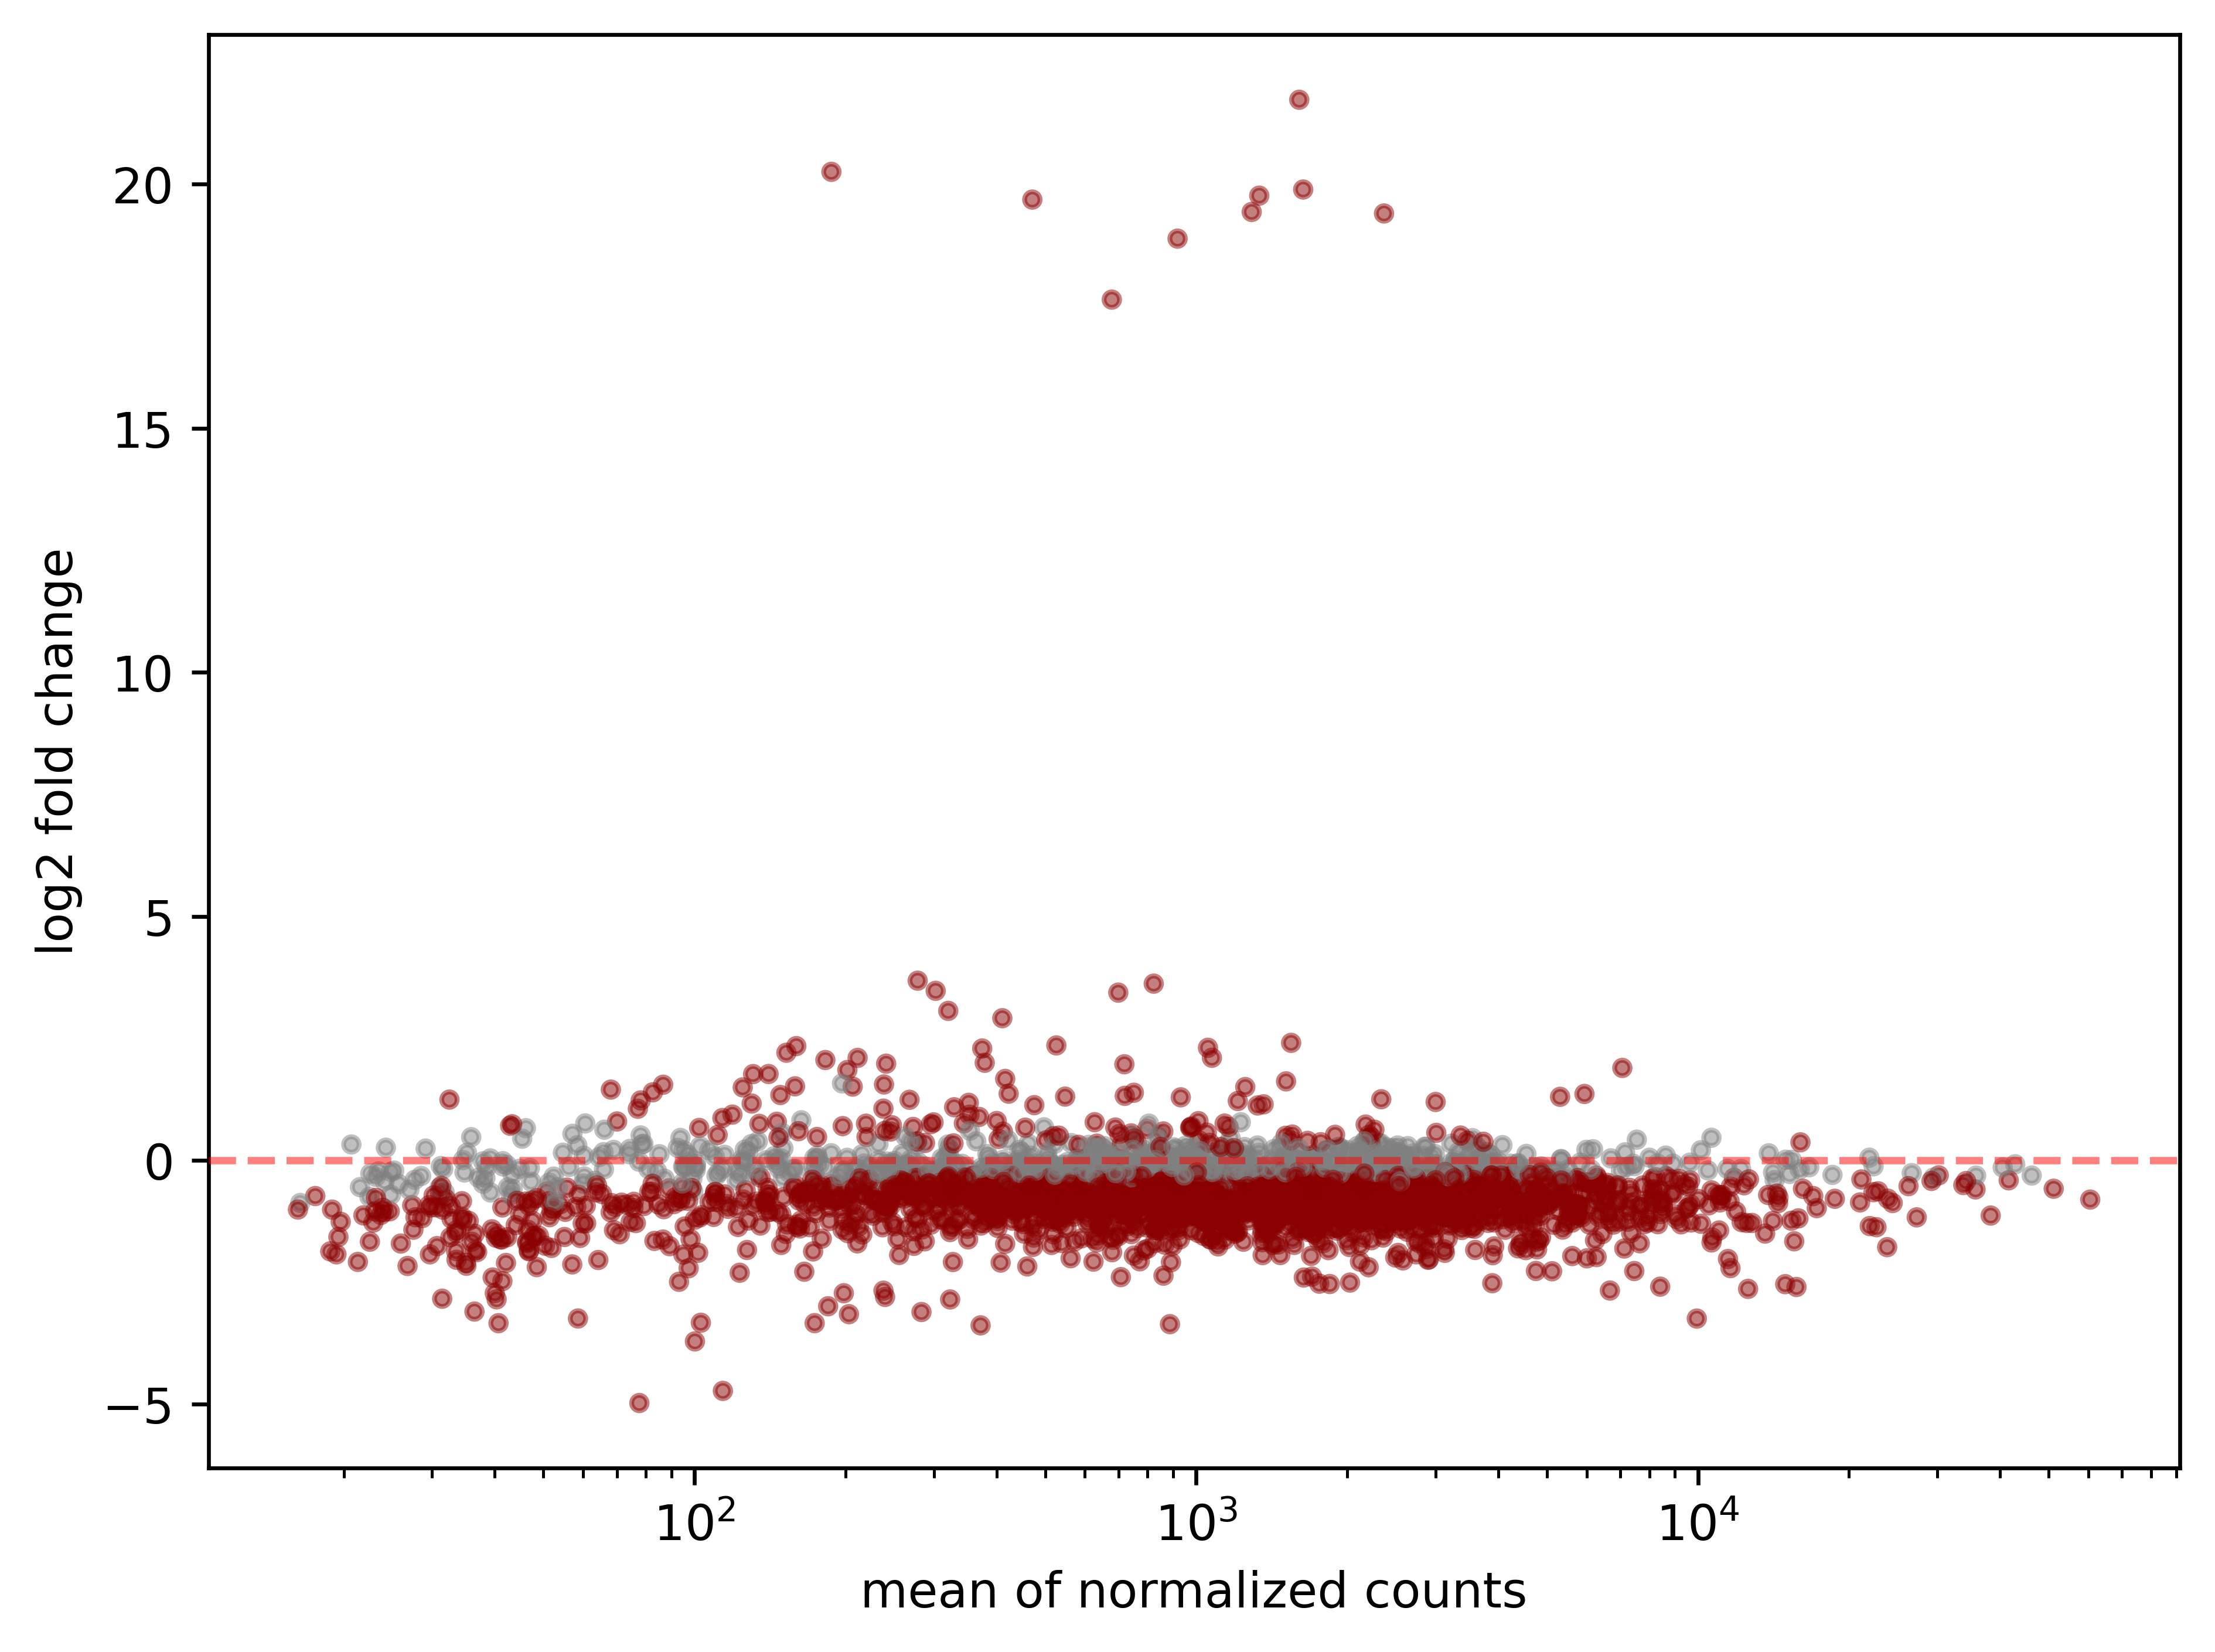

In [51]:
stat_res.plot_MA(s=10)

In [52]:
stat_res.lfc_shrink(coeff="condition_B_vs_A")

/opt/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
Fitting MAP LFCs...


Shrunk log2 fold change & Wald test p-value: condition B vs A
            baseMean  log2FoldChange     lfcSE       stat        pvalue  \
AACS     1237.172573       -0.707310  0.158847  -2.177920  2.941196e-02   
AAGAB    1550.276616       -0.110461  0.102837   0.050597  9.596469e-01   
AAR2     1779.502202       -1.518807  0.089858 -12.314164  7.599885e-35   
ABCA11P    27.788637       -1.387616  0.257588  -4.465221  7.998632e-06   
ABCB10    910.040664       -1.816510  0.136468  -8.006287  1.182235e-15   
...              ...             ...       ...        ...           ...   
ZSCAN9    464.547129       -1.049793  0.164831  -3.116750  1.828568e-03   
ZSWIM1    412.604199       -0.799040  0.135020  -3.264438  1.096816e-03   
ZSWIM6    869.716198       -1.090675  0.169134  -5.311723  1.085938e-07   
ZUP1      293.206013       -0.585567  0.120354  -3.864485  1.113237e-04   
ZXDC     1183.040040       -1.345803  0.149880  -7.199237  6.055025e-13   

                 padj  
AACS     3.88

... done in 0.40 seconds.



In [53]:
stat_res.summary()

Log2 fold change & Wald test p-value: condition B vs A
            baseMean  log2FoldChange     lfcSE       stat        pvalue  \
AACS     1237.172573       -0.707310  0.158847  -2.177920  2.941196e-02   
AAGAB    1550.276616       -0.110461  0.102837   0.050597  9.596469e-01   
AAR2     1779.502202       -1.518807  0.089858 -12.314164  7.599885e-35   
ABCA11P    27.788637       -1.387616  0.257588  -4.465221  7.998632e-06   
ABCB10    910.040664       -1.816510  0.136468  -8.006287  1.182235e-15   
...              ...             ...       ...        ...           ...   
ZSCAN9    464.547129       -1.049793  0.164831  -3.116750  1.828568e-03   
ZSWIM1    412.604199       -0.799040  0.135020  -3.264438  1.096816e-03   
ZSWIM6    869.716198       -1.090675  0.169134  -5.311723  1.085938e-07   
ZUP1      293.206013       -0.585567  0.120354  -3.864485  1.113237e-04   
ZXDC     1183.040040       -1.345803  0.149880  -7.199237  6.055025e-13   

                 padj  
AACS     3.885449e-0

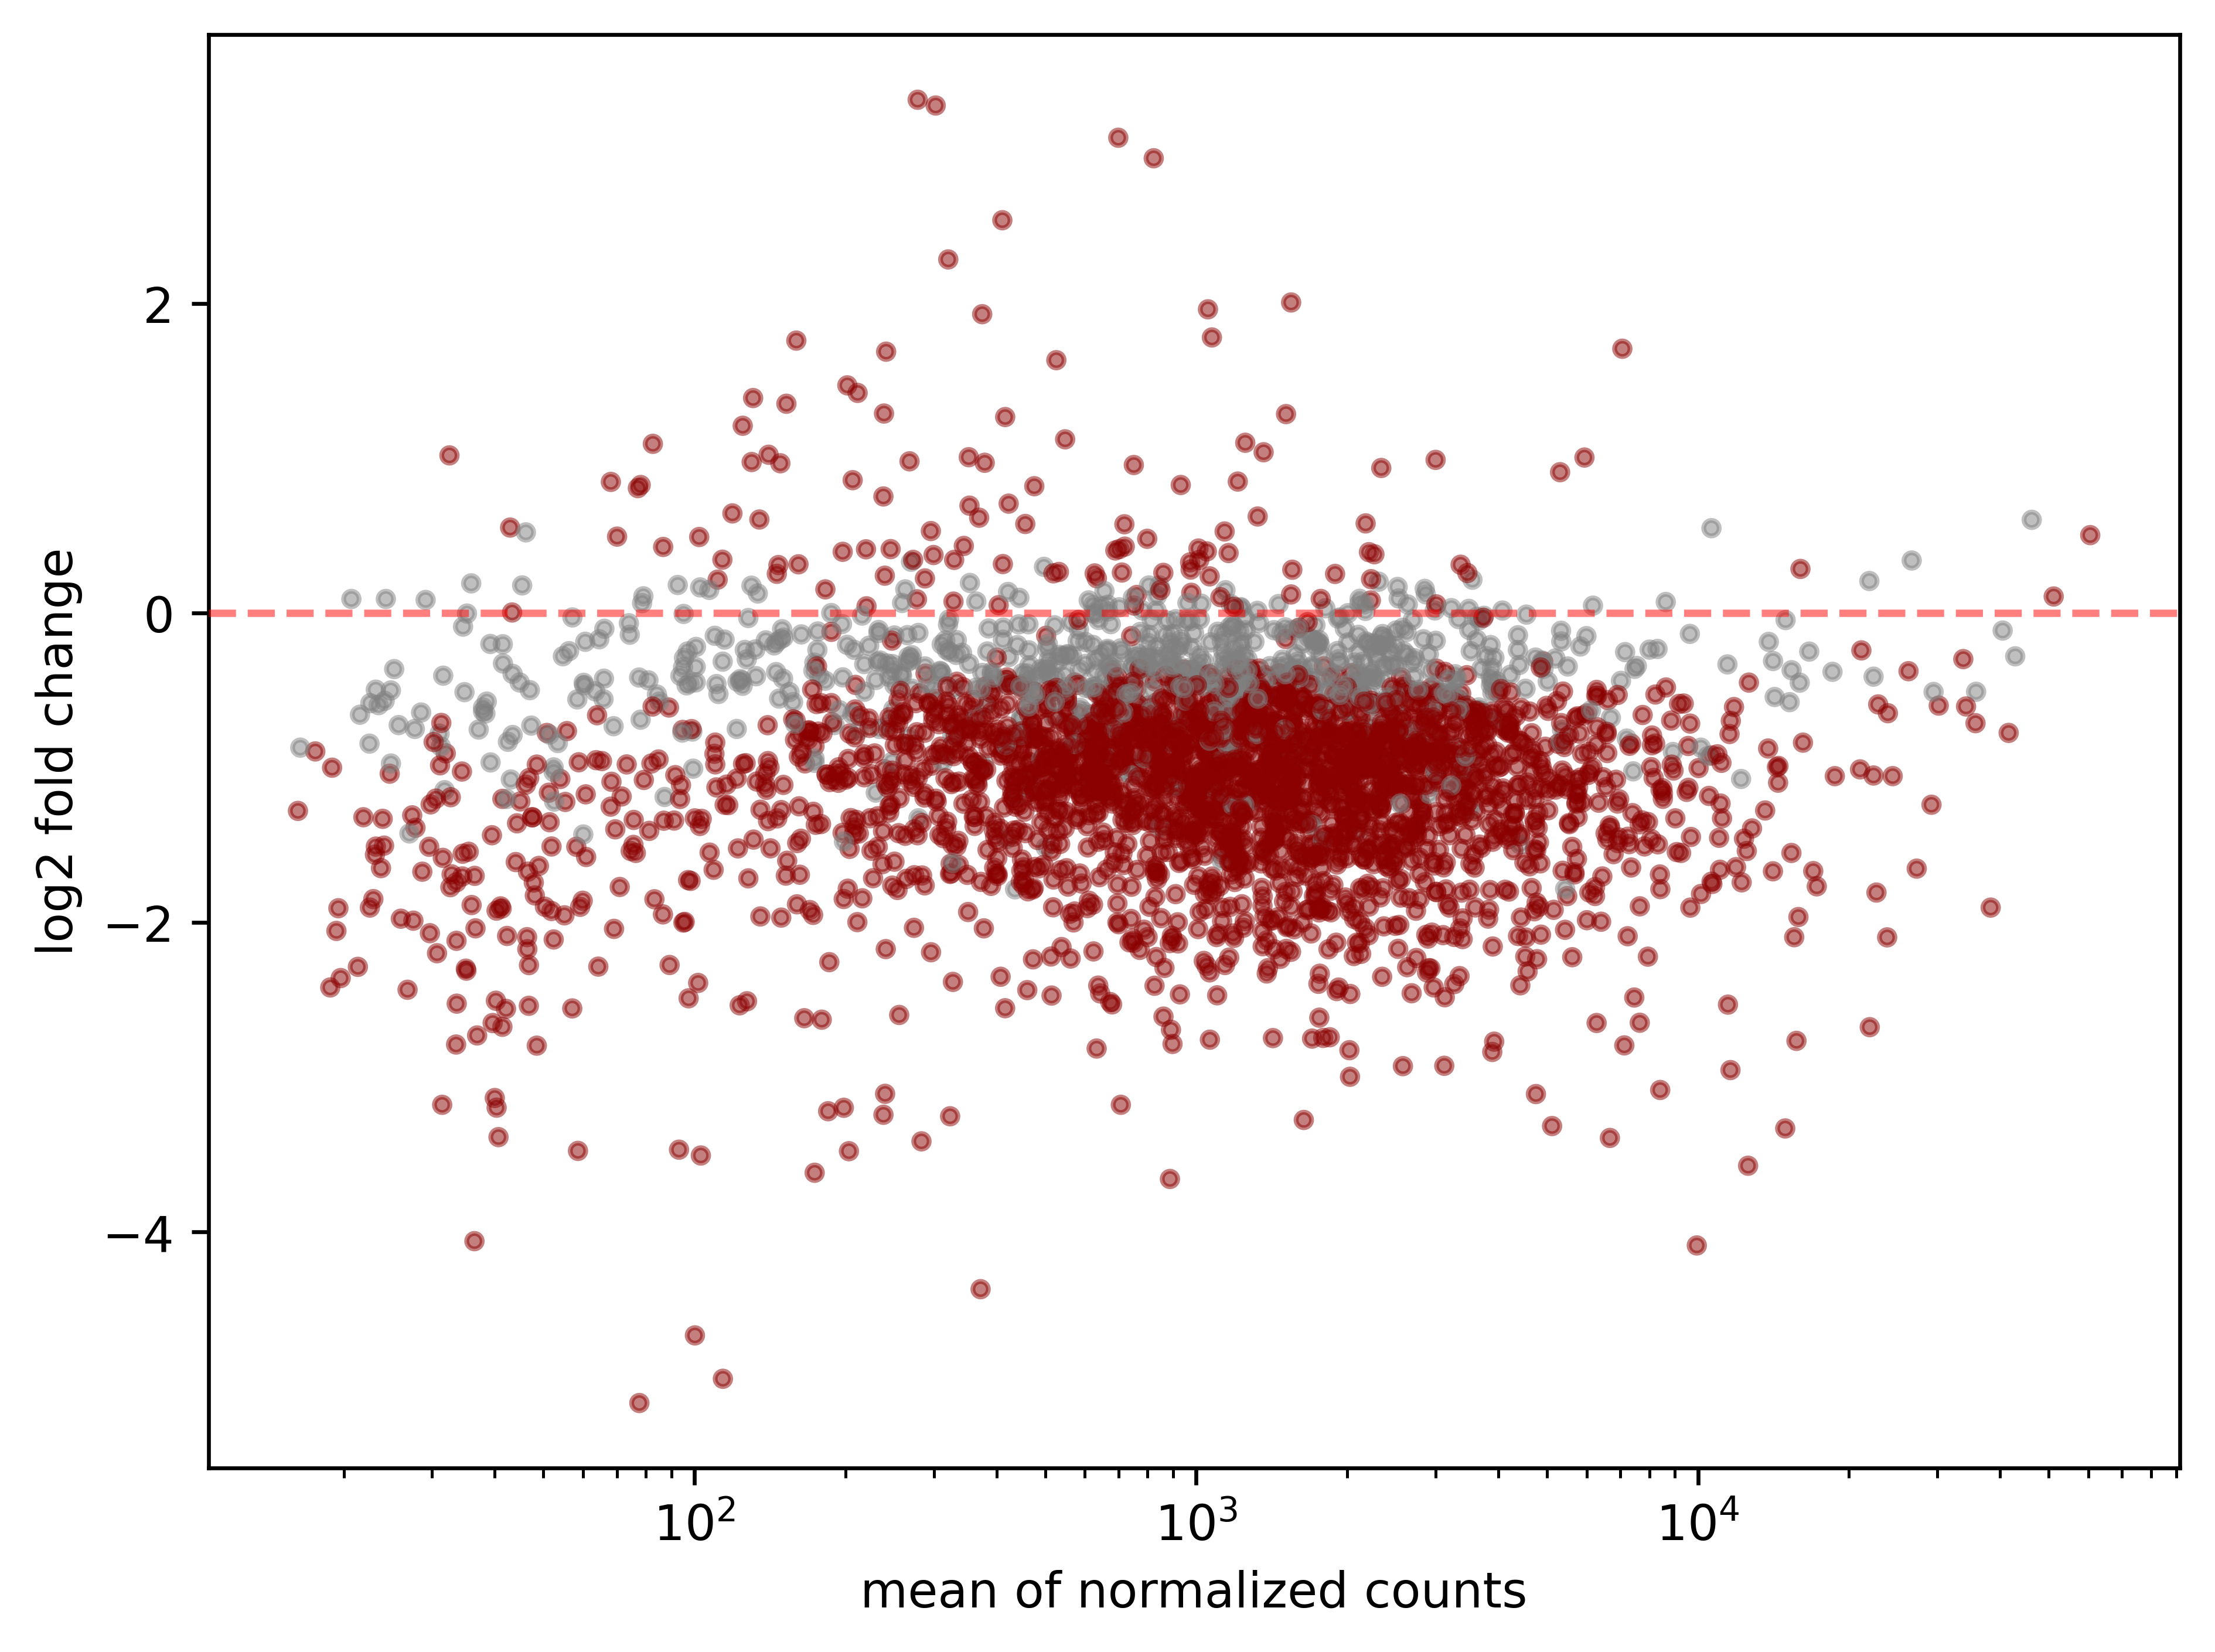

In [54]:
stat_res.plot_MA(s=10)

In [55]:
OUTPUT_PATH = "/Users/katsiarynadavydzenka/Documents/PhD_AI/CN-aware-DGE/Python/results"
os.makedirs(OUTPUT_PATH, exist_ok=True)  # Create path if it doesn't exist
stat_res.results_df.to_csv(os.path.join(OUTPUT_PATH, "res_CNaware_test4.csv"))